<a href="https://colab.research.google.com/github/Shivani-781/Machine-Learning-and-its-Applications/blob/master/Simple_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h2>Simple Linear Regression Practice - Death Rate data</h2>**

Importing libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading .csv file

In [9]:
df = pd.read_csv('share.csv')
df.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [10]:
df.shape

(3141, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   County                                        3141 non-null   object
 1   FIPS                                          3141 non-null   int64 
 2   Met Objective of 45.5? (1)                    3141 non-null   object
 3   Age-Adjusted Death Rate                       3141 non-null   object
 4   Lower 95% Confidence Interval for Death Rate  3141 non-null   object
 5   Upper 95% Confidence Interval for Death Rate  3141 non-null   object
 6   Average Deaths per Year                       3141 non-null   object
 7   Recent Trend (2)                              3141 non-null   object
 8   Recent 5-Year Trend (2) in Death Rates        3141 non-null   object
 9   Lower 95% Confidence Interval for Trend       3141 non-null   object
 10  

Defining X and Y taking 'Age-Adjusted Death Rate' & 'Lower 95% Confidence Interval for Death Rate'

In [18]:
X = df.iloc[:2813, 3].astype(float).values
Y = df.iloc[:2813, 4].astype(float).values

Calculating slope and intercept

In [22]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)
num = 0
denom = 0
for i in range(len(X)):
 num += (X[i] - mean_X) * (Y[i] - mean_Y)
 denom += (X[i] - mean_X) ** 2
m = num/denom
c = mean_Y - mean_X * m
print("Slope: ", m)
print("Intercept: ", c)

Slope:  0.8130625894586994
Intercept:  -0.44768268624177665


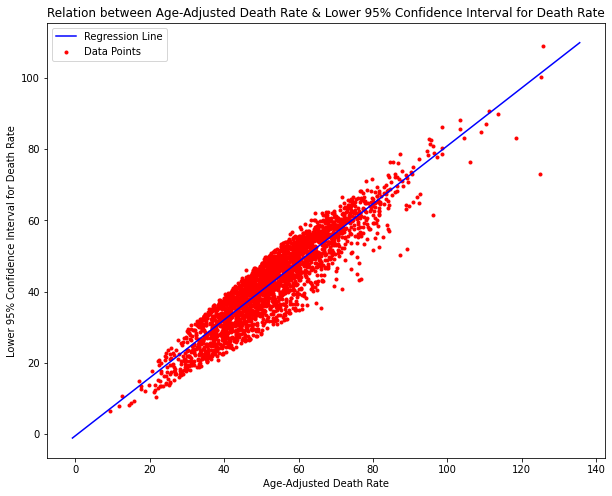

In [26]:
#Plotting the regression line
max_x = np.max(X) + 10
min_x = np.min(X) - 10
x = np.linspace(min_x, max_x, 1000)
y = m*x + c
plt.figure(figsize = (10, 8))
plt.plot(x, y, color = 'blue', label = 'Regression Line')

#Plotting the data points
plt.scatter(X, Y, color = 'red', marker = '.', label = 'Data Points')

plt.title('Relation between Age-Adjusted Death Rate & Lower 95% Confidence Interval for Death Rate')
plt.xlabel('Age-Adjusted Death Rate')
plt.ylabel('Lower 95% Confidence Interval for Death Rate')
plt.legend()
plt.show()

Calculating RMSE 

In [27]:
rmse = 0
for i in range(len(X)):
  y_pred = m * X[i] + c
  rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(X))
print("RMSE: ", rmse)

RMSE:  4.82222408046543


Calculating R^2 Score

In [28]:
ss_tot = 0
ss_res = 0
for i in range(len(X)):
  y_pred = m * X[i] + c
  ss_res += (Y[i] - y_pred) ** 2
  ss_tot += (Y[i] - mean_Y) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R^2 score: ", r2)

R^2 score:  0.8484177930485508


Predicting for unknown values

In [29]:
def pred(x1):
  y1 = m * x1 + c
  print(y1)
pred(40)

32.074820892106196


Training Using Scikit Learn

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((-1, 1))
lreg = LinearRegression()
lreg.fit(X,Y)
Y_pred = lreg.predict(X)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2score = lreg.score(X, Y)
print("RMSE: ", rmse)
print("R2Score: ", r2score)

RMSE:  4.822224080465426
R2Score:  0.8484177930485514


Defining X and Y taking 'Lower 95% Confidence Interval for Death Rate' & 'Upper 95% Confidence Interval for Death Rate'

In [32]:
X = df.iloc[:2813, 4].astype(float).values
Y = df.iloc[:2813, 5].astype(float).values

Calculating slope and intercept

In [35]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)
num = 0
denom = 0
for i in range(len(X)):
 num += (X[i] - mean_X) * (Y[i] - mean_Y)
 denom += (X[i] - mean_X) ** 2
m = num/denom
c = mean_Y - mean_X * m
print("Slope: ", m)
print("Intercept: ", c)

Slope:  1.0328843838255326
Intercept:  22.067040810098696


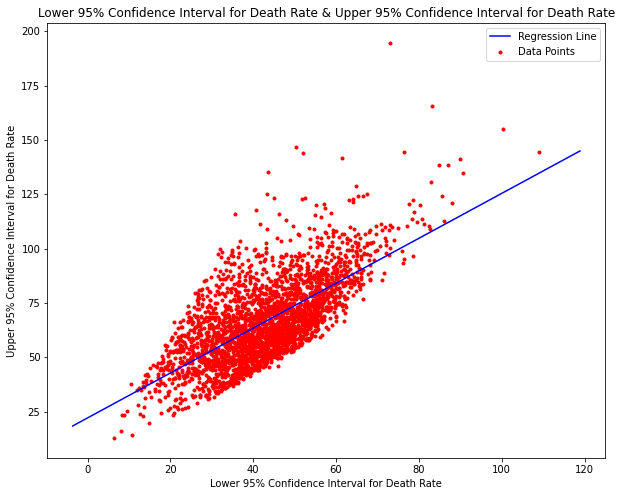

In [37]:
#Plotting the regression line
max_x = np.max(X) + 10
min_x = np.min(X) - 10
x = np.linspace(min_x, max_x, 1000)
y = m*x + c
plt.figure(figsize = (10, 8))
plt.plot(x, y, color = 'blue', label = 'Regression Line')

#Plotting the data points
plt.scatter(X, Y, color = 'red', marker = '.', label = 'Data Points')

plt.title('Lower 95% Confidence Interval for Death Rate & Upper 95% Confidence Interval for Death Rate')
plt.xlabel('Lower 95% Confidence Interval for Death Rate')
plt.ylabel('Upper 95% Confidence Interval for Death Rate')
plt.legend()
plt.show()

Calculating RMSE

In [38]:
rmse = 0
for i in range(len(X)):
  y_pred = m * X[i] + c
  rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(X))
print("RMSE: ", rmse)

RMSE:  13.52154831348172


Calculating R2 Score

In [39]:
ss_tot = 0
ss_res = 0
for i in range(len(X)):
  y_pred = m * X[i] + c
  ss_res += (Y[i] - y_pred) ** 2
  ss_tot += (Y[i] - mean_Y) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R^2 score: ", r2)

R^2 score:  0.47233803220801096


Predicting on unknown data

In [41]:
def pred(x1):
  y1 = m * x1 + c
  print(y1)
pred(25)

47.88915040573701


Training using scikit learn

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((-1, 1))
lreg = LinearRegression()
lreg.fit(X,Y)
Y_pred = lreg.predict(X)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2score = lreg.score(X, Y)
print("RMSE: ", rmse)
print("R2Score: ", r2score)

RMSE:  13.521548313481729
R2Score:  0.4723380322080095
